In [2]:
import pandas as pd

In [79]:
lsoa_df_reduced = pd.read_pickle('../raw_data/lsoa_data.pkl')[['force','file_name']].drop_duplicates()

In [139]:
lsoa_df_reduced = lsoa_df_reduced.reset_index()
lsoa_df_reduced.head()

,level_0,index,force,file_name
0,0,0,City of London Police,city_of_london_police
1,1,4,Metropolitan Police Service,metropolitan_police_service
2,2,4640,Greater Manchester Police,greater_manchester_police
3,3,6249,Merseyside Police,merseyside_police
4,4,7122,South Yorkshire Police,south_yorkshire_police


In [145]:
test1 = 'Greater Manchester Police'

In [146]:
index = lsoa_df[lsoa_df['force']==test1].index.values[0]

In [147]:
index

4640

In [148]:
file_name = lsoa_df.iloc[index]['file_name']

In [149]:
file_name

'greater_manchester_police'

In [150]:
raw_data_filepath = '../raw_data/'

In [151]:
 area_path = raw_data_filepath+'forces_pkl/'+file_name+'.pkl'
 area_path   

'../raw_data/forces_pkl/greater_manchester_police.pkl'

In [152]:
force_df1 = pd.read_pickle(area_path)

In [153]:
force_df1.head()

,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category
0,2018-06,Greater Manchester Police,-2.432473,53.599681,E01004766,Bolton 005A,Anti-social behaviour,NaN
1,2018-06,Greater Manchester Police,-2.434820,53.600077,E01004766,Bolton 005A,Anti-social behaviour,NaN
2,2018-06,Greater Manchester Police,-2.444791,53.601343,E01004766,Bolton 005A,Bicycle theft,Investigation complete; no suspect identified
3,2018-06,Greater Manchester Police,-2.443144,53.598491,E01004766,Bolton 005A,Burglary,Unable to prosecute suspect
4,2018-06,Greater Manchester Police,-2.440893,53.598535,E01004766,Bolton 005A,Burglary,Investigation complete; no suspect identified


In [29]:
crime_count_df = area_df.groupby(['Month']).agg({'LSOA name':'count'})

In [32]:
crime_count_df.columns = ['crime_count']

In [33]:
crime_count_df.head()

,crime_count
Month,
2018-06,467
2018-07,334
2018-08,222
2018-09,237
2018-10,205


In [154]:
c_type = 'Burglary'

In [155]:
town = 'Bolton'

In [37]:
area_df['city']=area_df['LSOA name'].apply(lambda x: x[:-5])

In [38]:
area_df.head()

,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,city
0,2018-06,City of London Police,-0.095960,51.517534,E01000001,City of London 001A,Anti-social behaviour,NaN,City of London
1,2018-06,City of London Police,-0.095892,51.516391,E01000001,City of London 001A,Burglary,Unable to prosecute suspect,City of London
2,2018-06,City of London Police,-0.098642,51.517146,E01000001,City of London 001A,Burglary,Investigation complete; no suspect identified,City of London
3,2018-06,City of London Police,-0.098572,51.516767,E01000001,City of London 001A,Criminal damage and arson,Status update unavailable,City of London
4,2018-06,City of London Police,-0.097334,51.521567,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,City of London


In [39]:
area_df = area_df.loc[area_df['Crime type'] == crime]

In [40]:
area_df.head()

,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,city
1,2018-06,City of London Police,-0.095892,51.516391,E01000001,City of London 001A,Burglary,Unable to prosecute suspect,City of London
2,2018-06,City of London Police,-0.098642,51.517146,E01000001,City of London 001A,Burglary,Investigation complete; no suspect identified,City of London
51,2018-06,City of London Police,-0.074330,51.513647,E01000005,City of London 001E,Burglary,Investigation complete; no suspect identified,City of London
52,2018-06,City of London Police,-0.077596,51.515849,E01000005,City of London 001E,Burglary,Investigation complete; no suspect identified,City of London
53,2018-06,City of London Police,-0.076270,51.515504,E01000005,City of London 001E,Burglary,Investigation complete; no suspect identified,City of London


In [41]:
crime_count_df = area_df.groupby(['Month']).agg({'LSOA name':'count'})
crime_count_df.columns = ['crime_count']
crime_count_df.head()

,crime_count
Month,
2018-06,29
2018-07,16
2018-08,20
2018-09,4
2018-10,9


In [43]:
force_df['city']=force_df['LSOA name'].apply(lambda x: x[:-5])
force_df.head()

,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,city
0,2018-06,City of London Police,-0.095960,51.517534,E01000001,City of London 001A,Anti-social behaviour,NaN,City of London
1,2018-06,City of London Police,-0.095892,51.516391,E01000001,City of London 001A,Burglary,Unable to prosecute suspect,City of London
2,2018-06,City of London Police,-0.098642,51.517146,E01000001,City of London 001A,Burglary,Investigation complete; no suspect identified,City of London
3,2018-06,City of London Police,-0.098572,51.516767,E01000001,City of London 001A,Criminal damage and arson,Status update unavailable,City of London
4,2018-06,City of London Police,-0.097334,51.521567,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,City of London


In [108]:
def get_crime_count(force_df,city = None, crime = None):
    if city != None:
        force_df['city']=force_df['LSOA name'].apply(lambda x: x[:-5])
        force_df = force_df.loc[force_df['city'] == city]
    if crime != None:
        force_df = force_df.loc[force_df['Crime type'] == crime]
           
    crime_count_df = force_df.groupby(['Month']).agg({'LSOA name':'count'})
    crime_count_df.columns = ['crime_count']
    return crime_count_df 

In [157]:
crime_count_df = get_crime_count(force_df1)
crime_count_df.head()

,crime_count
Month,
2018-06,25232
2018-07,19267
2018-08,14688
2018-09,12389
2018-10,11669


In [158]:
crime_count_df = get_crime_count(force_df, city = town)
crime_count_df.head()

,crime_count
Month,


In [53]:
crime_count_df = get_crime_count(force_df, crime = c_type)
crime_count_df.head()

,crime_count
Month,
2018-06,29
2018-07,16
2018-08,20
2018-09,4
2018-10,9


In [159]:
crime_count_df = get_crime_count(force_df, city = town, crime = c_type)
crime_count_df.head()

,crime_count
Month,


In [160]:
def get_lsoa_data():
    lsoa_df = pd.read_pickle('../raw_data/lsoa_data.pkl')
    return lsoa_df

In [98]:
lsoa_df =get_lsoa_data()
lsoa_df['pop']=lsoa_df['pop'].apply(lambda x: int(x.replace(",","")))
lsoa_df['lon']=lsoa_df['lon'].apply(lambda x: float(x))
lsoa_df['lat']=lsoa_df['lat'].apply(lambda x: float(x))

In [101]:
lsoa_df.to_pickle('../raw_data/lsoa_data.pkl')

In [104]:
lsoa_df.to_csv('../raw_data/lsoa_data.csv')

In [161]:
def get_population(force, city = None):
    lsoa_df = get_lsoa_data()
    lsoa_df = lsoa_df.loc[lsoa_df['force'] == force]
    if city != None:
        lsoa_df = lsoa_df.loc[lsoa_df['city'] == city]
    
    return lsoa_df['pop'].sum()

In [162]:
pop = get_population(test)
pop

1409020

In [105]:
pop1 = get_population(test,'Sheffield')
pop1

584853

In [129]:
crime_count_df1 = get_crime_count(force_df1)
crime_count_df1.head()

,crime_count
Month,
2018-06,59906
2018-07,44459
2018-08,33053
2018-09,27771
2018-10,26054


In [120]:
def get_crime_rate(force,force_df,city = None, crime = None):
    crime_count_df = get_crime_count(force_df = force_df,city = city, crime = crime)
    population = get_population(force = force, city = city)
    crime_count_df['crime_rate']=crime_count_df['crime_count'].apply(lambda x: round(x/population*1000,2))
    return crime_count_df

In [127]:
crime_count_df1 = get_crime_rate(force1,force_df1)
crime_count_df1.head()

,crime_count,crime_rate
Month,,
2018-06,59906,42.52
2018-07,44459,31.55
2018-08,33053,23.46
2018-09,27771,19.71
2018-10,26054,18.49


In [124]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month'>

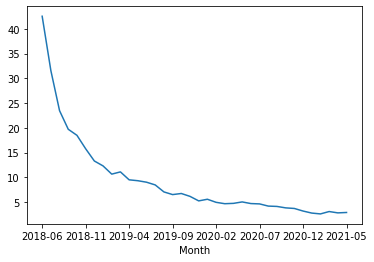

In [128]:
crime_count_df1['crime_rate'].plot()

In [163]:
test1 = 'Greater Manchester Police'
c_type1 = 'Burglary'
town1 = 'Bolton'

In [164]:
def create_area_df(force):
    lsoa_df = get_lsoa_data()
    lsoa_df = lsoa_df[['force','file_name']].drop_duplicates()
    lsoa_df = lsoa_df.reset_index()
    indx = lsoa_df[lsoa_df['force']==force].index.values[0]
    file_name = lsoa_df.iloc[indx]['file_name']
    area_path = raw_data_filepath+file_name+'.pkl'
    area_df = pd.read_pickle(area_path)
    return area_df

In [166]:
greater_man_df = create_area_df(test1)
greater_man_df.head()

,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category
0,2018-06,Greater Manchester Police,-2.432473,53.599681,E01004766,Bolton 005A,Anti-social behaviour,NaN
1,2018-06,Greater Manchester Police,-2.434820,53.600077,E01004766,Bolton 005A,Anti-social behaviour,NaN
2,2018-06,Greater Manchester Police,-2.444791,53.601343,E01004766,Bolton 005A,Bicycle theft,Investigation complete; no suspect identified
3,2018-06,Greater Manchester Police,-2.443144,53.598491,E01004766,Bolton 005A,Burglary,Unable to prosecute suspect
4,2018-06,Greater Manchester Police,-2.440893,53.598535,E01004766,Bolton 005A,Burglary,Investigation complete; no suspect identified


In [169]:
greater_man_df['Month'].value_counts()

2018-06    25232
2018-07    19267
2018-08    14688
2018-09    12389
2018-10    11669
2018-11    10371
2018-12     8976
2019-01     8637
2019-03     7997
2019-02     7579
2019-04     7274
2019-05     7037
2019-06     6153
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month'>

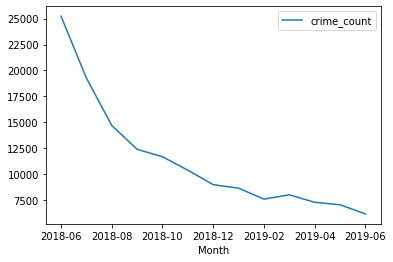

In [168]:
greater_man_crimec_df = get_crime_count(greater_man_df,city = None, crime = None)
greater_man_crimec_df.plot()

In [170]:
clean_police_df = pd.read_csv('../raw_data/cleaned_police_data.csv')

<AxesSubplot:>

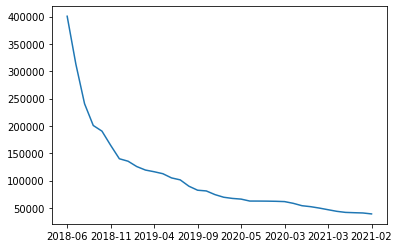

In [176]:
clean_police_df['Month'].value_counts().plot()

In [172]:
merged_df = pd.read_csv('../raw_data/merged.csv')

In [173]:
merged_df['Month'].value_counts()

2018-07    621007
2018-06    588297
2018-10    582863
2018-08    580738
2019-07    580514
2019-05    578733
2020-05    574356
2019-03    573744
2020-08    573204
2019-06    571709
2020-07    569649
2019-04    560115
2020-06    553173
2019-08    551373
2018-11    548314
2018-09    547809
2019-10    546455
2020-10    540937
2020-09    537117
2021-03    532171
2019-01    531279
2020-04    530169
2019-09    520832
2020-01    515878
2019-11    513156
2018-12    512189
2020-11    509881
2019-02    509369
2021-05    505779
2020-03    495307
2021-04    491377
2020-02    490071
2019-12    487767
2020-12    469974
2021-01    461151
2021-02    444261
Name: Month, dtype: int64

In [174]:
merged_df.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN
1,1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN
2,2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN
3,3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
4,4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [177]:
merged_df.shape

(19300718, 13)

In [216]:
L = merged_df.iloc[:5000000][merged_df.iloc[:5000000].duplicated(subset='Crime ID')]

In [221]:
L['Last outcome category'].value_counts()

Status update unavailable                              22887
Investigation complete; no suspect identified           7841
Court result unavailable                                1966
Under investigation                                     1963
Unable to prosecute suspect                             1125
Awaiting court outcome                                   484
Local resolution                                         302
Offender given a caution                                 286
Formal action is not in the public interest               51
Offender given community sentence                         42
Further investigation is not in the public interest       35
Offender given penalty notice                             32
Action to be taken by another organisation                28
Offender sent to prison                                   23
Defendant found not guilty                                22
Court case unable to proceed                              17
Offender fined          

In [217]:
b = L[L['Crime type']=='Drugs']['Crime ID'].iloc[0]

In [218]:
b

'd6d2235d9565990671e05a26cba42fa23c553b39ee477ab71563e0244aabdb1e'

In [219]:
a = merged_df.iloc[100]['Crime ID']

In [220]:
merged_df[merged_df['Crime ID']==b]

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
71280,71280,d6d2235d9565990671e05a26cba42fa23c553b39ee477a...,2020-01,North Yorkshire Police,North Yorkshire Police,-1.080932,53.957808,On or near Coppergate,E01033070,York 013I,Drugs,Unable to prosecute suspect,NaN
71281,71281,d6d2235d9565990671e05a26cba42fa23c553b39ee477a...,2020-01,North Yorkshire Police,North Yorkshire Police,-1.080932,53.957808,On or near Coppergate,E01033070,York 013I,Drugs,Status update unavailable,NaN


In [178]:
merged_df2 = merged_df.drop(columns ='Month').drop_duplicates().shape

In [179]:
merged_df2

(19300718, 12)

In [225]:
merged_df['Longitude']=merged_df['Longitude'].apply(lambda x: str(x))
merged_df['Latitude']=merged_df['Latitude'].apply(lambda x: str(x))

In [236]:
merged_df['LSOA code'].isna().sum()

861756

In [237]:
merged_df['Crime type'].isna().sum()

0

In [263]:
crime_types = (merged_df['Crime type'].value_counts()).to_dict()

In [264]:
i=0
for k in crime_types.keys():
    crime_types[k] = i
    i+=1
crime_types

{'Violence and sexual offences': 0,
 'Anti-social behaviour': 1,
 'Criminal damage and arson': 2,
 'Other theft': 3,
 'Public order': 4,
 'Vehicle crime': 5,
 'Burglary': 6,
 'Shoplifting': 7,
 'Drugs': 8,
 'Other crime': 9,
 'Theft from the person': 10,
 'Bicycle theft': 11,
 'Robbery': 12,
 'Possession of weapons': 13}

In [268]:
crime_types_encode = pd.Series(crime_types)
crime_types_encode

Violence and sexual offences     0
Anti-social behaviour            1
Criminal damage and arson        2
Other theft                      3
Public order                     4
Vehicle crime                    5
Burglary                         6
Shoplifting                      7
Drugs                            8
Other crime                      9
Theft from the person           10
Bicycle theft                   11
Robbery                         12
Possession of weapons           13
dtype: int64

In [253]:
outcome_categories = (merged_df['Last outcome category'].value_counts()).to_dict()
outcome_categories

{'Investigation complete; no suspect identified': 5408135,
 'Unable to prosecute suspect': 4275155,
 'Status update unavailable': 1997591,
 'Court result unavailable': 696309,
 'Under investigation': 541696,
 'Local resolution': 320438,
 'Awaiting court outcome': 181913,
 'Offender given a caution': 165297,
 'Further investigation is not in the public interest': 151122,
 'Action to be taken by another organisation': 138642,
 'Formal action is not in the public interest': 99018,
 'Offender given a drugs possession warning': 46928,
 'Offender sent to prison': 36506,
 'Offender given penalty notice': 33380,
 'Offender given community sentence': 33316,
 'Further action is not in the public interest': 23768,
 'Offender fined': 18716,
 'Defendant found not guilty': 16788,
 'Offender given suspended prison sentence': 12554,
 'Court case unable to proceed': 11722,
 'Offender given conditional discharge': 11620,
 'Suspect charged as part of another case': 10700,
 'Offender otherwise dealt with'

In [244]:
len(outcome_categories)

27

In [254]:
i=0
for k in outcome_categories.keys():
    outcome_categories[k] = i
    i+=1
outcome_categories

{'Investigation complete; no suspect identified': 0,
 'Unable to prosecute suspect': 1,
 'Status update unavailable': 2,
 'Court result unavailable': 3,
 'Under investigation': 4,
 'Local resolution': 5,
 'Awaiting court outcome': 6,
 'Offender given a caution': 7,
 'Further investigation is not in the public interest': 8,
 'Action to be taken by another organisation': 9,
 'Formal action is not in the public interest': 10,
 'Offender given a drugs possession warning': 11,
 'Offender sent to prison': 12,
 'Offender given penalty notice': 13,
 'Offender given community sentence': 14,
 'Further action is not in the public interest': 15,
 'Offender fined': 16,
 'Defendant found not guilty': 17,
 'Offender given suspended prison sentence': 18,
 'Court case unable to proceed': 19,
 'Offender given conditional discharge': 20,
 'Suspect charged as part of another case': 21,
 'Offender otherwise dealt with': 22,
 'Offender ordered to pay compensation': 23,
 'Defendant sent to Crown Court': 24,


In [258]:
import pickle
filename='../raw_data/outcome_categories.pkl'
outfile=open(filename,'wb')
pickle.dump(outcome_categories,outfile)

In [259]:
outfile.close()

In [261]:
outcomes_encoding_df = pd.DataFrame.from_dict(outcome_categories)
outcomes_encoding_df

ValueError: If using all scalar values, you must pass an index

In [ ]:
dict_outcomes = pd.read_pkl

In [232]:
del type

In [226]:
merged_df['other_id']=merged_df.apply(lambda x: x['Longitude']+x['Latitude']+x['LSOA code']+x['Crime type'], axis=1)

TypeError: can only concatenate str (not "float") to str

In [265]:
merged_df = merged_df.drop(columns = 'Reported by')

In [266]:
merged_df = merged_df.drop(columns = 'Location')

In [269]:
merged_df.dtypes

Unnamed: 0                 int64
Crime ID                  object
Month                     object
Falls within              object
Longitude                 object
Latitude                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [271]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300718 entries, 0 to 19300717
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Crime ID               object 
 2   Month                  object 
 3   Falls within           object 
 4   Longitude              object 
 5   Latitude               object 
 6   LSOA code              object 
 7   LSOA name              object 
 8   Crime type             object 
 9   Last outcome category  object 
 10  Context                float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ GB


In [274]:
merged_df.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300718 entries, 0 to 19300717
Data columns (total 11 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             Int64 
 1   Crime ID               string
 2   Month                  string
 3   Falls within           string
 4   Longitude              string
 5   Latitude               string
 6   LSOA code              string
 7   LSOA name              string
 8   Crime type             string
 9   Last outcome category  string
 10  Context                Int64 
dtypes: Int64(2), string(9)
memory usage: 1.6 GB


In [275]:
reduced_df = merged_df.iloc[:250000]

In [276]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             250000 non-null  int64  
 1   Crime ID               206123 non-null  object 
 2   Month                  250000 non-null  object 
 3   Falls within           250000 non-null  object 
 4   Longitude              250000 non-null  object 
 5   Latitude               250000 non-null  object 
 6   LSOA code              247155 non-null  object 
 7   LSOA name              247155 non-null  object 
 8   Crime type             250000 non-null  object 
 9   Last outcome category  206123 non-null  object 
 10  Context                0 non-null       float64
dtypes: float64(1), int64(1), object(9)
memory usage: 21.0+ MB


In [279]:
dtype_change = {'Crime ID':'string','Month': 'datetime64','Falls within':'string','Longitude':'float','Latitude':'float','LSOA code':'string','LSOA name':'string','Crime type':'category','Last outcome category':'category','Context':'float'}
dtype_change

{'Crime ID': 'string',
 'Month': 'datetime64',
 'Falls within': 'string',
 'Longitude': 'float',
 'Latitude': 'float',
 'LSOA code': 'string',
 'LSOA name': 'string',
 'Crime type': 'category',
 'Last outcome category': 'category',
 'Context': 'float'}

In [292]:
reduced_df.astype(dtype_change).dtypes

Unnamed: 0                        int64
Crime ID                         string
Month                    datetime64[ns]
Falls within                     string
Longitude                       float64
Latitude                        float64
LSOA code                        string
LSOA name                        string
Crime type                     category
Last outcome category          category
Context                         float64
dtype: object

In [283]:
type(reduced_df)

pandas.core.frame.DataFrame

In [293]:
reduced_df = reduced_df.astype(dtype_change)

In [294]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             250000 non-null  int64         
 1   Crime ID               206123 non-null  string        
 2   Month                  250000 non-null  datetime64[ns]
 3   Falls within           250000 non-null  string        
 4   Longitude              247156 non-null  float64       
 5   Latitude               247156 non-null  float64       
 6   LSOA code              247155 non-null  string        
 7   LSOA name              247155 non-null  string        
 8   Crime type             250000 non-null  category      
 9   Last outcome category  206123 non-null  category      
 10  Context                0 non-null       float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 17.6 MB


In [295]:
reduced_df.head()

,Unnamed: 0,Crime ID,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,-1.570572,53.607792,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN
1,1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,-1.670108,53.553629,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN
2,2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,-1.879031,53.943807,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN
3,3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,-1.882746,53.933807,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
4,4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,-1.881467,53.944510,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [297]:
reduced_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             250000 non-null  int64         
 1   Month                  250000 non-null  datetime64[ns]
 2   Falls within           250000 non-null  string        
 3   Longitude              247156 non-null  float64       
 4   Latitude               247156 non-null  float64       
 5   LSOA code              247155 non-null  string        
 6   LSOA name              247155 non-null  string        
 7   Crime type             250000 non-null  category      
 8   Last outcome category  206123 non-null  category      
 9   Context                0 non-null       float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), string(3)
memory usage: 15.7 MB


In [298]:
merged_df = merged_df.astype(dtype_change)

In [299]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300718 entries, 0 to 19300717
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   Crime ID               string        
 2   Month                  datetime64[ns]
 3   Falls within           string        
 4   Longitude              float64       
 5   Latitude               float64       
 6   LSOA code              string        
 7   LSOA name              string        
 8   Crime type             category      
 9   Last outcome category  category      
 10  Context                float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 1.3 GB


In [300]:
merged_df = merged_df.drop(columns = 'Unnamed: 0')

In [301]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300718 entries, 0 to 19300717
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crime ID               string        
 1   Month                  datetime64[ns]
 2   Falls within           string        
 3   Longitude              float64       
 4   Latitude               float64       
 5   LSOA code              string        
 6   LSOA name              string        
 7   Crime type             category      
 8   Last outcome category  category      
 9   Context                float64       
dtypes: category(2), datetime64[ns](1), float64(3), string(4)
memory usage: 1.2 GB


In [302]:
merged_df.drop_duplicates(inplace = True)

In [303]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17526680 entries, 0 to 19300717
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crime ID               string        
 1   Month                  datetime64[ns]
 2   Falls within           string        
 3   Longitude              float64       
 4   Latitude               float64       
 5   LSOA code              string        
 6   LSOA name              string        
 7   Crime type             category      
 8   Last outcome category  category      
 9   Context                float64       
dtypes: category(2), datetime64[ns](1), float64(3), string(4)
memory usage: 1.2 GB


In [304]:
len(merged_df['Crime ID'])-len(merged_df['Crime ID'].drop_duplicates())

3419188

In [305]:
merged_df = merged_df.sort_values(['Month', 'Falls within','LSOA name'], ascending = (True,True,True))

In [306]:
merged_df.to_csv("../raw_data/merged2.csv")

In [307]:
merged_df.drop_duplicates('Crime ID', keep ='first')

,Crime ID,Month,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Context
9064997,<NA>,2018-06-01,Avon and Somerset Constabulary,-2.509930,51.410873,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
9065003,d07e88b32ac6b7684c493f1a05a3949ed6859031db0262...,2018-06-01,Avon and Somerset Constabulary,-2.509930,51.410873,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
9065004,a131b2d13dd749055ecd03f54ed7b3d69d3313dca1837e...,2018-06-01,Avon and Somerset Constabulary,-2.510162,51.410998,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
9065005,d8287c64a02011675e6113ae0fb159cb45336308994248...,2018-06-01,Avon and Somerset Constabulary,-2.509930,51.410873,E01014399,Bath and North East Somerset 001A,Other theft,Status update unavailable,NaN
9065006,e8272c40e825b002f99b3ffe0b7f6929eb4c3502108bdb...,2018-06-01,Avon and Somerset Constabulary,-2.516919,51.423683,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...
16426889,253a1ded04be4ee0152148bb75ec1303d854c245d72706...,2021-05-01,Wiltshire Police,-1.759025,50.994654,E01031995,Wiltshire 062E,Other theft,Under investigation,NaN
16426890,f56cb6775dbf3ddb95474f8a58bdc0e9dc34052160600a...,2021-05-01,Wiltshire Police,-1.758262,50.993385,E01031995,Wiltshire 062E,Public order,Under investigation,NaN
16426891,6576b346d24af516dc6e62707bf4d274e30e29eeab44cc...,2021-05-01,Wiltshire Police,-1.739677,50.994244,E01031995,Wiltshire 062E,Vehicle crime,Investigation complete; no suspect identified,NaN
16426892,afc7751d9897f3f75ba20d5f86dd28bad965bc08ad5266...,2021-05-01,Wiltshire Police,-1.753306,50.995578,E01031995,Wiltshire 062E,Violence and sexual offences,Under investigation,NaN


In [308]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17526680 entries, 9064997 to 16426893
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crime ID               string        
 1   Month                  datetime64[ns]
 2   Falls within           string        
 3   Longitude              float64       
 4   Latitude               float64       
 5   LSOA code              string        
 6   LSOA name              string        
 7   Crime type             category      
 8   Last outcome category  category      
 9   Context                float64       
dtypes: category(2), datetime64[ns](1), float64(3), string(4)
memory usage: 1.2 GB


In [309]:
merged_df = merged_df.drop(columns = ['Crime ID','LSOA code','Last outcome category','Context'])

In [310]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17526680 entries, 9064997 to 16426893
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Month         datetime64[ns]
 1   Falls within  string        
 2   Longitude     float64       
 3   Latitude      float64       
 4   LSOA name     string        
 5   Crime type    category      
dtypes: category(1), datetime64[ns](1), float64(2), string(2)
memory usage: 819.0 MB


In [311]:
merged_df.to_csv("../raw_data/mapplot_police_data.csv")